In [8]:
import random
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features.shape, labels.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

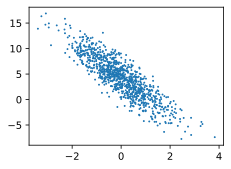

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [9]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = TensorDataset(*data_arrays)
    return DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [6]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0) # init

# loss func
loss = nn.MSELoss()

# optim func
optim = torch.optim.SGD(net.parameters(), lr=0.03)

In [10]:
# train
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        optim.zero_grad()
        l.backward()
        optim.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1} / {num_epochs}, loss = {l: 5f}')


epoch 1 / 10, loss =  0.000174
epoch 2 / 10, loss =  0.000103
epoch 3 / 10, loss =  0.000103
epoch 4 / 10, loss =  0.000103
epoch 5 / 10, loss =  0.000104
epoch 6 / 10, loss =  0.000103
epoch 7 / 10, loss =  0.000104
epoch 8 / 10, loss =  0.000103
epoch 9 / 10, loss =  0.000104
epoch 10 / 10, loss =  0.000104


In [14]:
net[0].weight, net[0].bias

(Parameter containing:
 tensor([[ 1.9994, -3.3998]], requires_grad=True),
 Parameter containing:
 tensor([4.1997], requires_grad=True))